In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/agricultural_raw_material.csv')
df.head(10)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
5,Sep-90,412.18,-1.50%,196,-1.01%,1.79,0.00%,936.77,-1.52%,185.33,...,384.92,5.57%,0.90,2.27%,129.78,0.06%,199.59,-4.18%,811.62,-0.87%
6,Oct-90,394.64,-4.26%,198,1.02%,1.79,0.00%,901.85,-3.73%,189.76,...,409.31,6.34%,0.90,0.00%,121.31,-6.53%,206.98,3.70%,807.46,-0.51%
7,Nov-90,334.5,-15.24%,236,19.19%,1.82,1.68%,888.61,-1.47%,179.02,...,375.74,-8.20%,0.90,0.00%,130.50,7.58%,206.64,-0.16%,773.37,-4.22%
8,Dec-90,328.24,-1.87%,237,0.42%,1.85,1.65%,870.55,-2.03%,171.13,...,363.16,-3.35%,0.88,-2.22%,119.35,-8.54%,198.22,-4.07%,741.29,-4.15%
9,Jan-91,319.47,-2.67%,233,-1.69%,1.85,0.00%,887.41,1.94%,169.19,...,362.26,-0.25%,0.87,-1.14%,126.14,5.69%,186.94,-5.69%,721.85,-2.62%


In [3]:
# Replacing %, "," and "-"
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
df.head(10)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr90,482.34,NaN,236,NaN,1.83,NaN,1071.63,NaN,161.20,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,May90,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
6,Oct90,394.64,4.26,198,1.02,1.79,0.00,901.85,3.73,189.76,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51
7,Nov90,334.5,15.24,236,19.19,1.82,1.68,888.61,1.47,179.02,...,375.74,8.20,0.90,0.00,130.50,7.58,206.64,0.16,773.37,4.22
8,Dec90,328.24,1.87,237,0.42,1.85,1.65,870.55,2.03,171.13,...,363.16,3.35,0.88,2.22,119.35,8.54,198.22,4.07,741.29,4.15
9,Jan91,319.47,2.67,233,1.69,1.85,0.00,887.41,1.94,169.19,...,362.26,0.25,0.87,1.14,126.14,5.69,186.94,5.69,721.85,2.62


In [4]:
df.shape

(361, 25)

In [5]:
# Dropping rows with NaN values
df = df.dropna()
df.shape

(326, 25)

In [6]:
# Check to see if all NaN values are resolved
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [7]:
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


In [8]:
# Converting data type to float
lst = ['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price', 'Copra price % Change', 'Cotton price % Change','Fine wool Price', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']
df[lst] = df[lst].astype('float')
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [9]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df.head(10)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
6,1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51
7,1990-11-01,334.50,15.24,236.0,19.19,1.82,1.68,888.61,1.47,179.02,...,375.74,8.20,0.90,0.00,130.50,7.58,206.64,0.16,773.37,4.22
8,1990-12-01,328.24,1.87,237.0,0.42,1.85,1.65,870.55,2.03,171.13,...,363.16,3.35,0.88,2.22,119.35,8.54,198.22,4.07,741.29,4.15
9,1991-01-01,319.47,2.67,233.0,1.69,1.85,0.00,887.41,1.94,169.19,...,362.26,0.25,0.87,1.14,126.14,5.69,186.94,5.69,721.85,2.62
10,1991-02-01,323.23,1.18,226.0,3.00,1.87,1.08,596.02,32.84,176.93,...,371.70,2.61,0.85,2.30,126.77,0.50,220.67,18.04,706.81,2.08


In [10]:
# Indexing month
df = df.set_index('Month')
df.head(10)

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,2.39,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51
1990-11-01,334.50,15.24,236.0,19.19,1.82,1.68,888.61,1.47,179.02,5.66,...,375.74,8.20,0.90,0.00,130.50,7.58,206.64,0.16,773.37,4.22
1990-12-01,328.24,1.87,237.0,0.42,1.85,1.65,870.55,2.03,171.13,4.41,...,363.16,3.35,0.88,2.22,119.35,8.54,198.22,4.07,741.29,4.15
1991-01-01,319.47,2.67,233.0,1.69,1.85,0.00,887.41,1.94,169.19,1.13,...,362.26,0.25,0.87,1.14,126.14,5.69,186.94,5.69,721.85,2.62


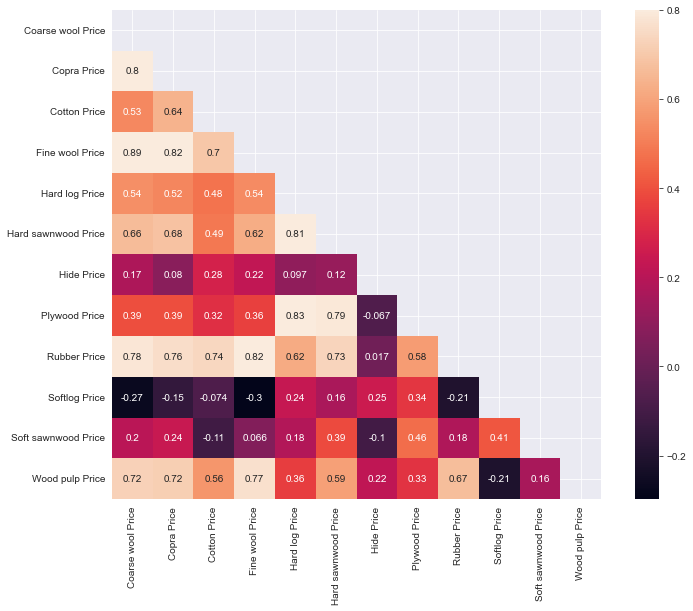

In [11]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'
#raw-materials list
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle part since matrix is symmetric(repetitive) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

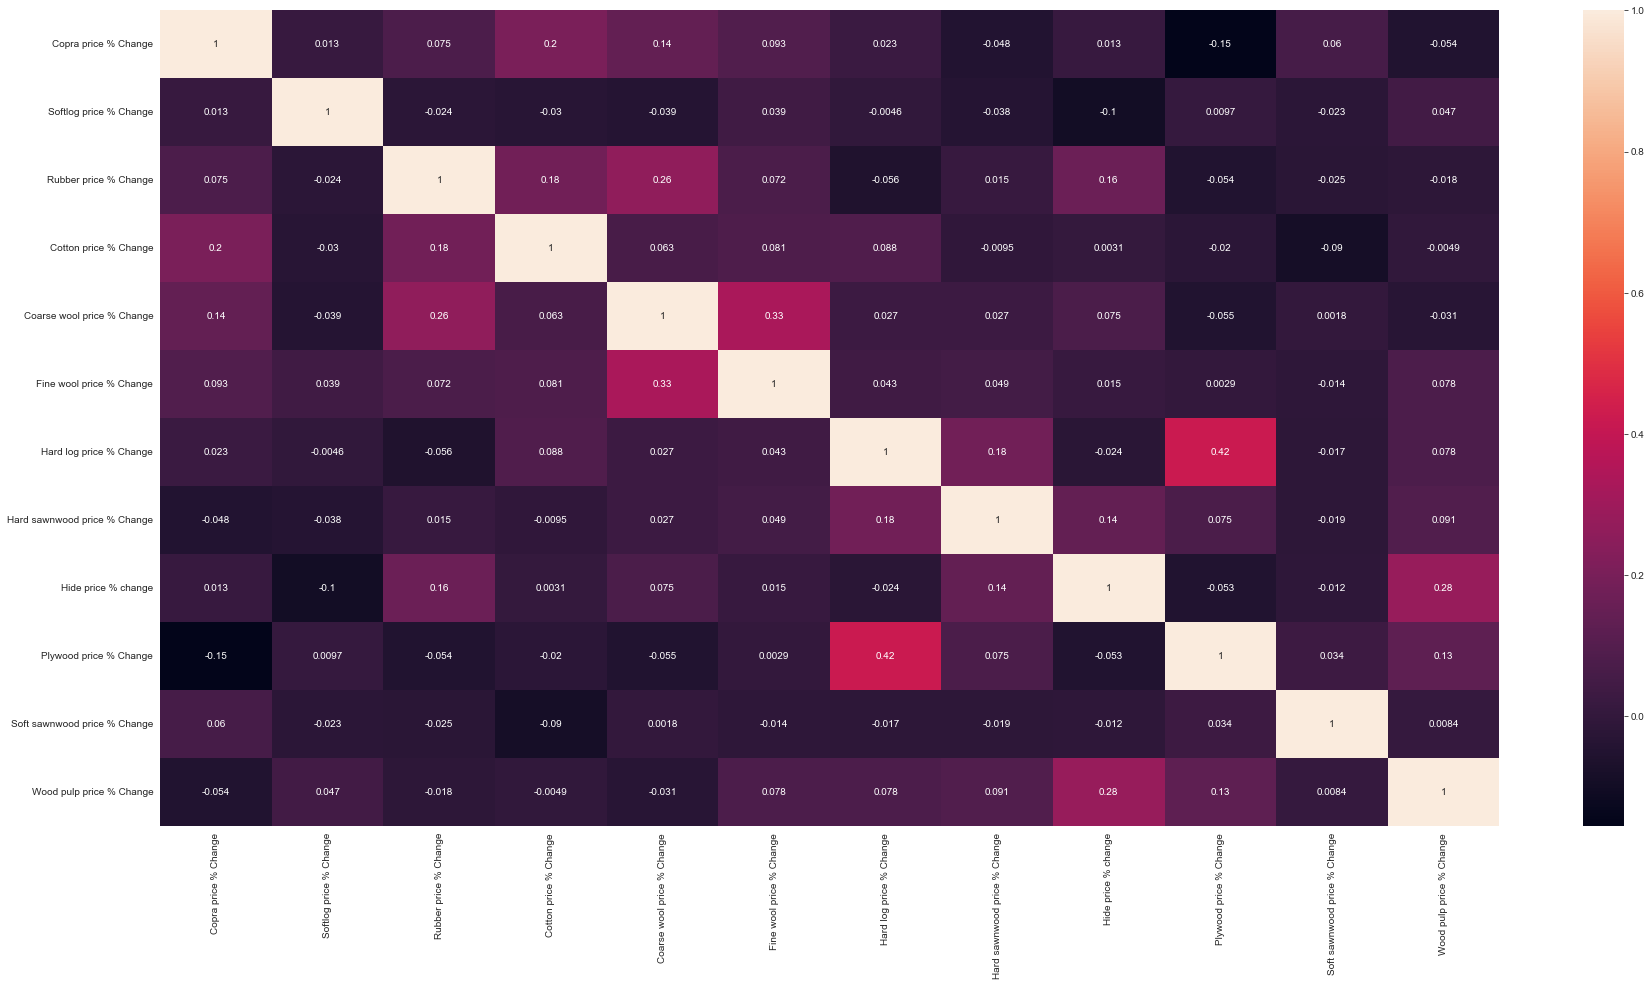

In [12]:
plt.figure(figsize=(30,15))
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

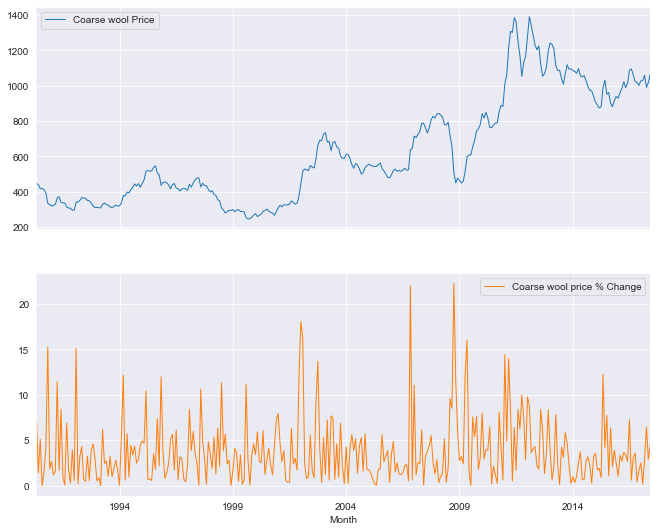

In [13]:
axes=df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11, 9), subplots=True, linewidth=1)

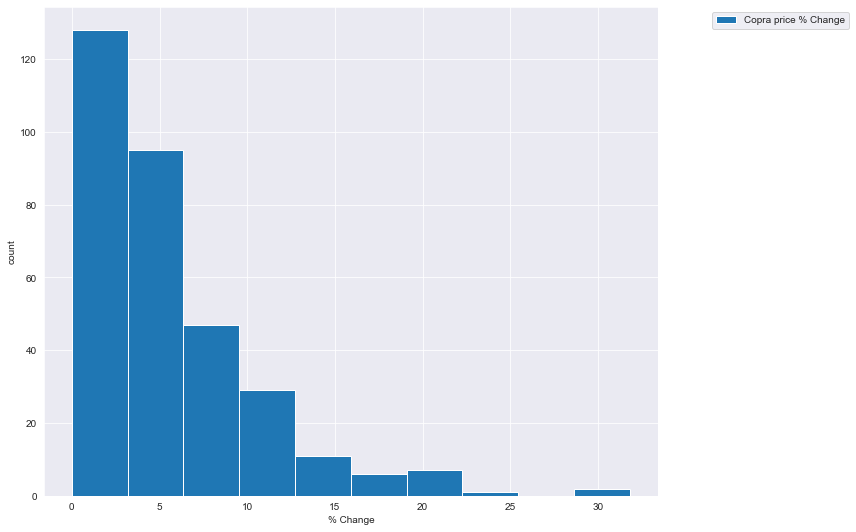

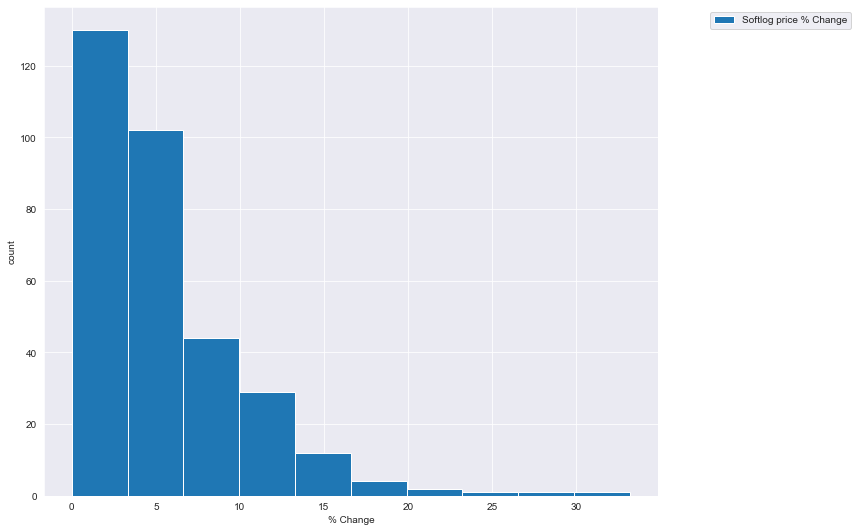

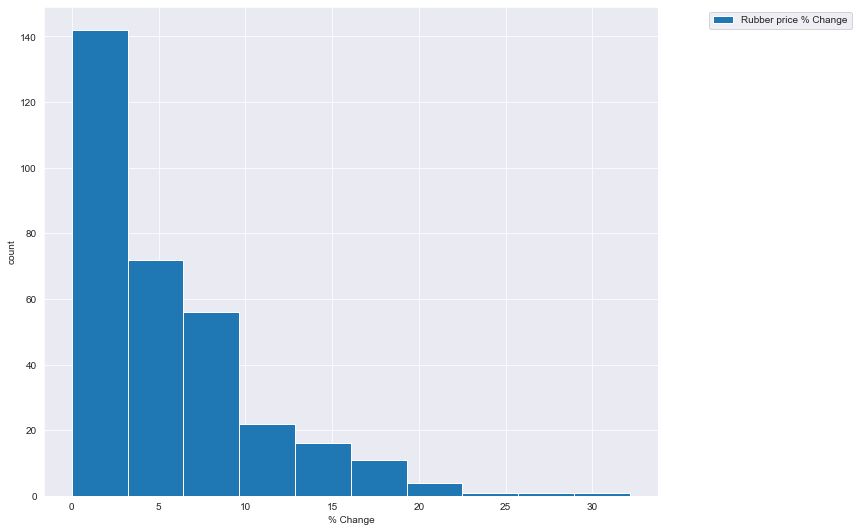

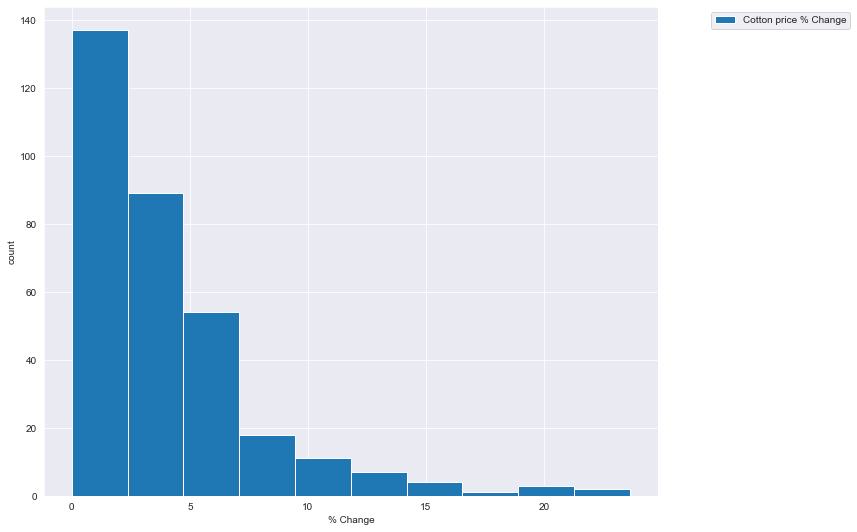

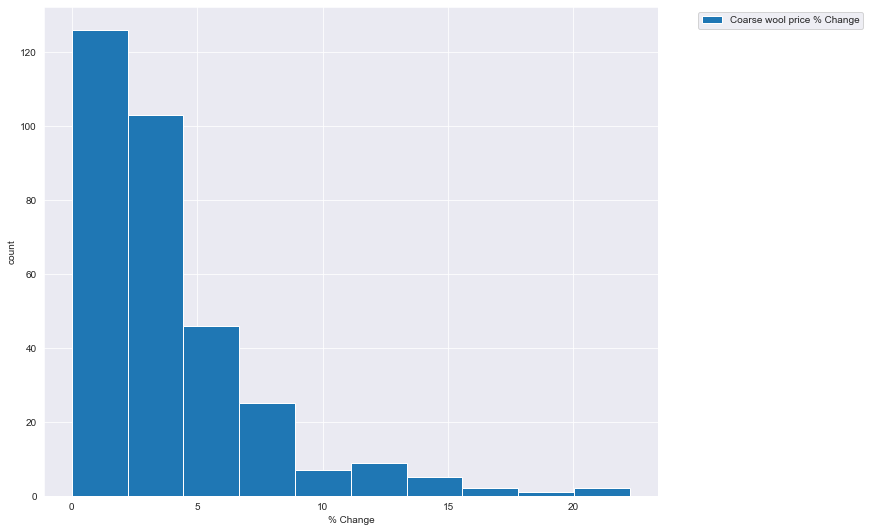

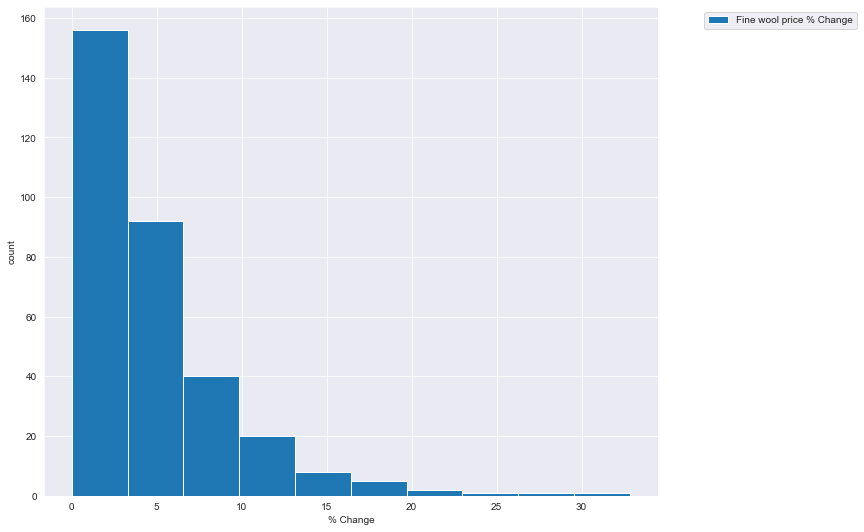

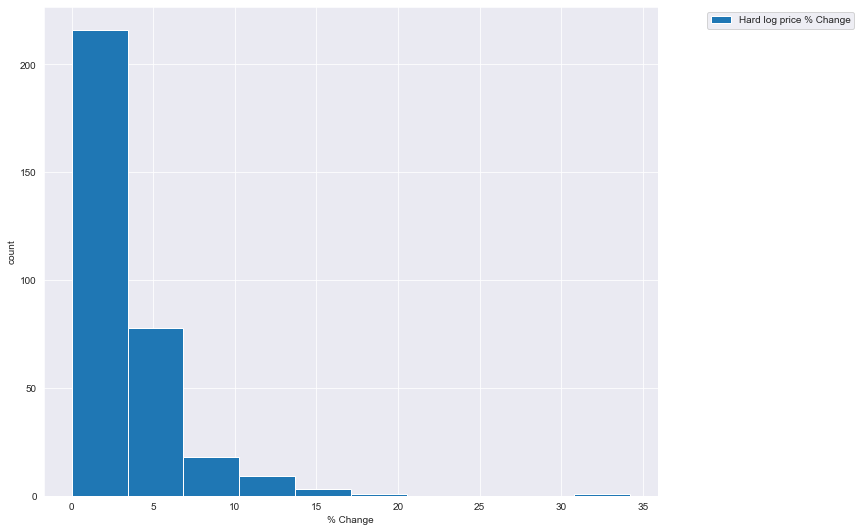

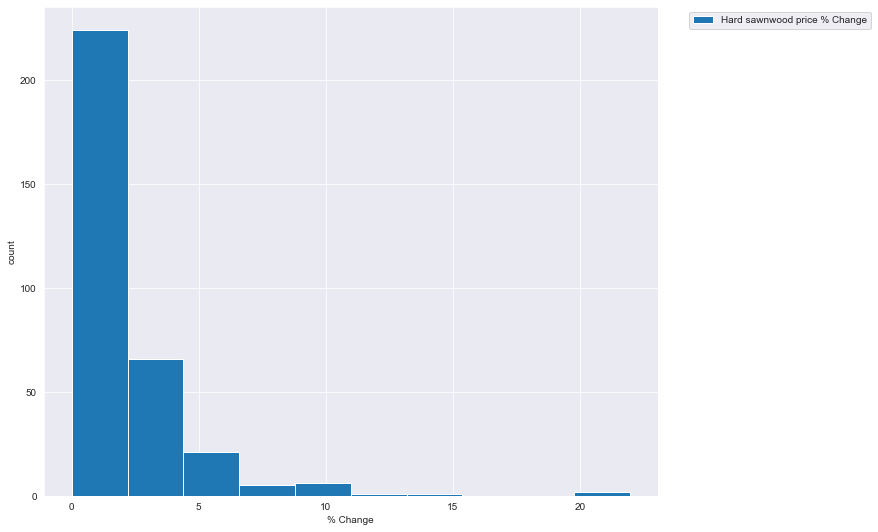

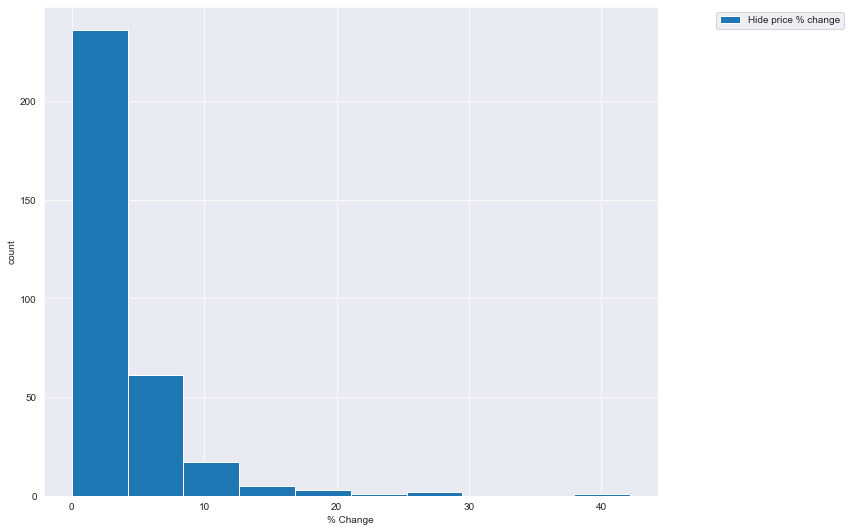

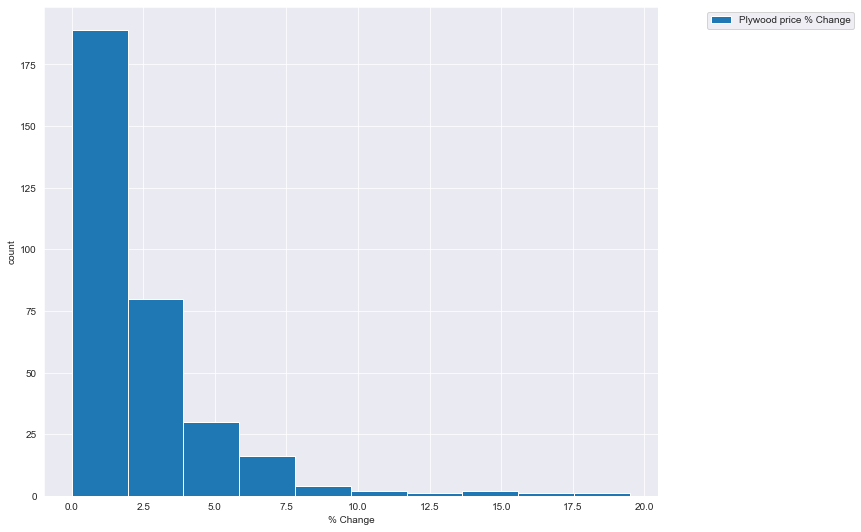

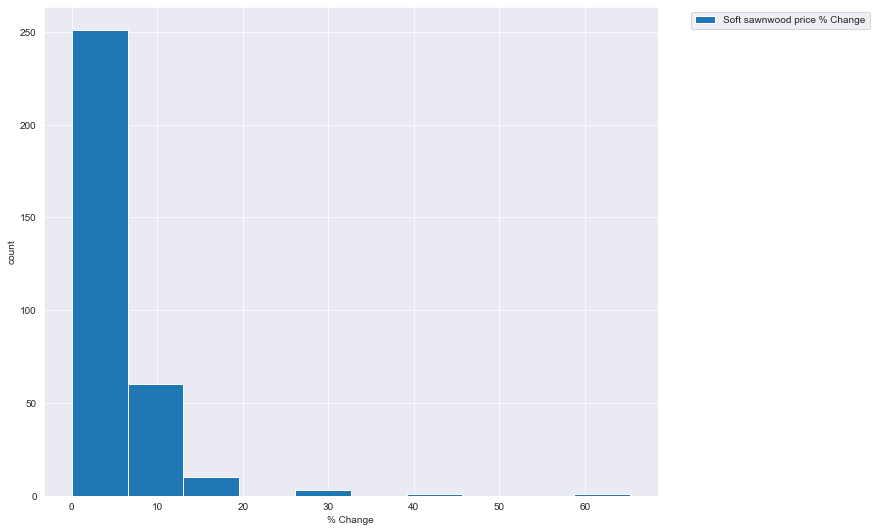

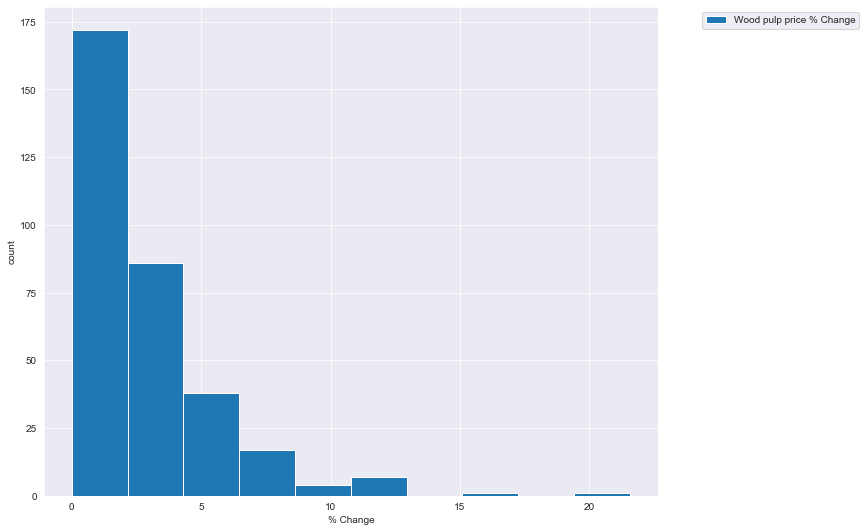

In [14]:
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

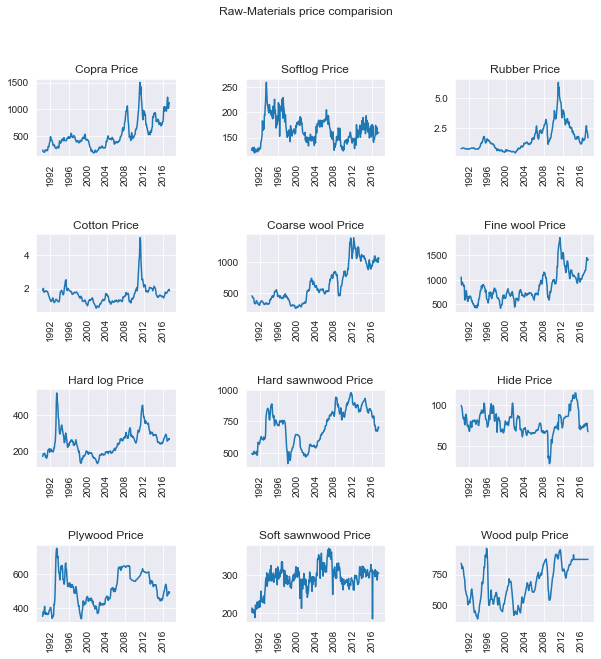

In [15]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle('Raw-Materials price comparision')
plt.show()

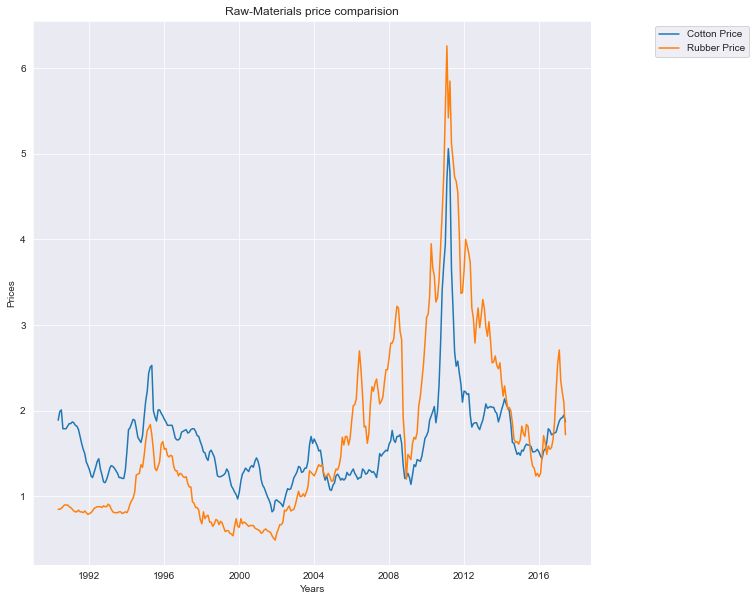

In [16]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))
plt.show()

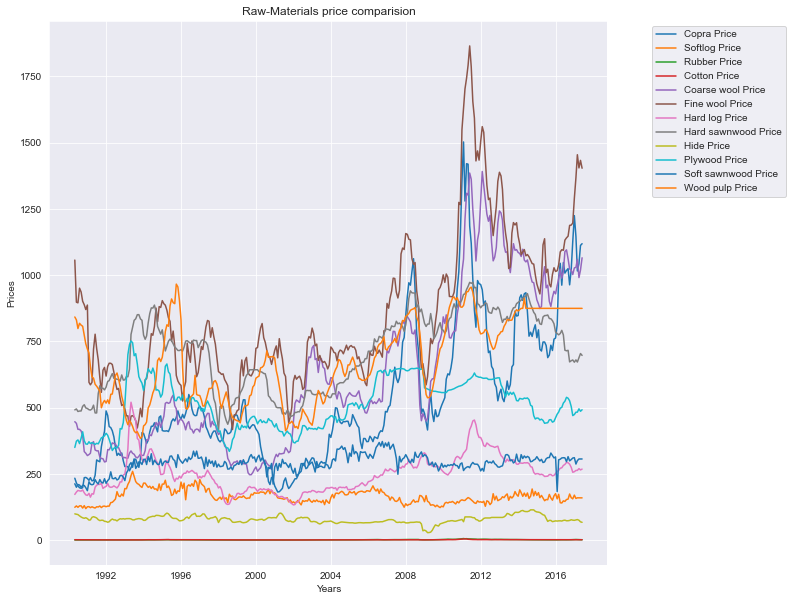

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))
plt.show()

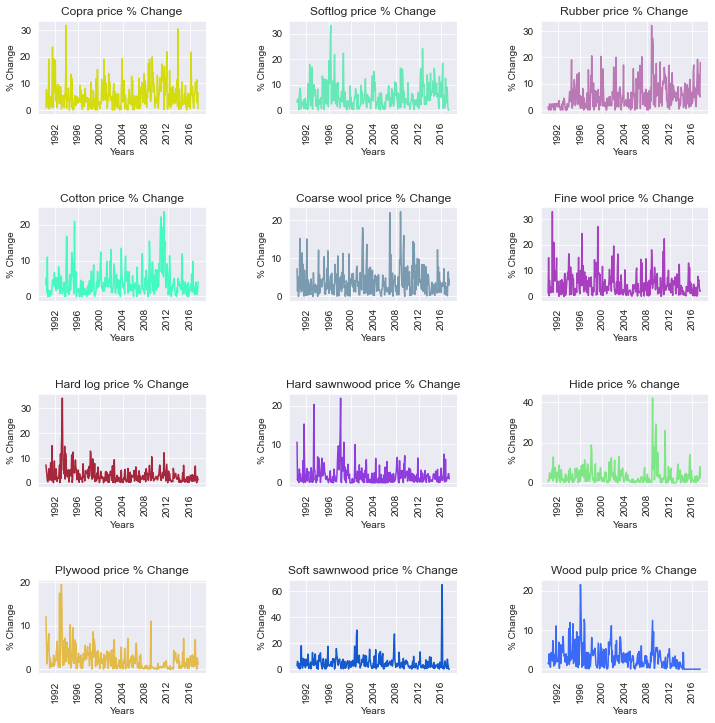

In [18]:
import random
plt.figure(figsize=(12,12))
for i in range(len(changelist)):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
plt.show()

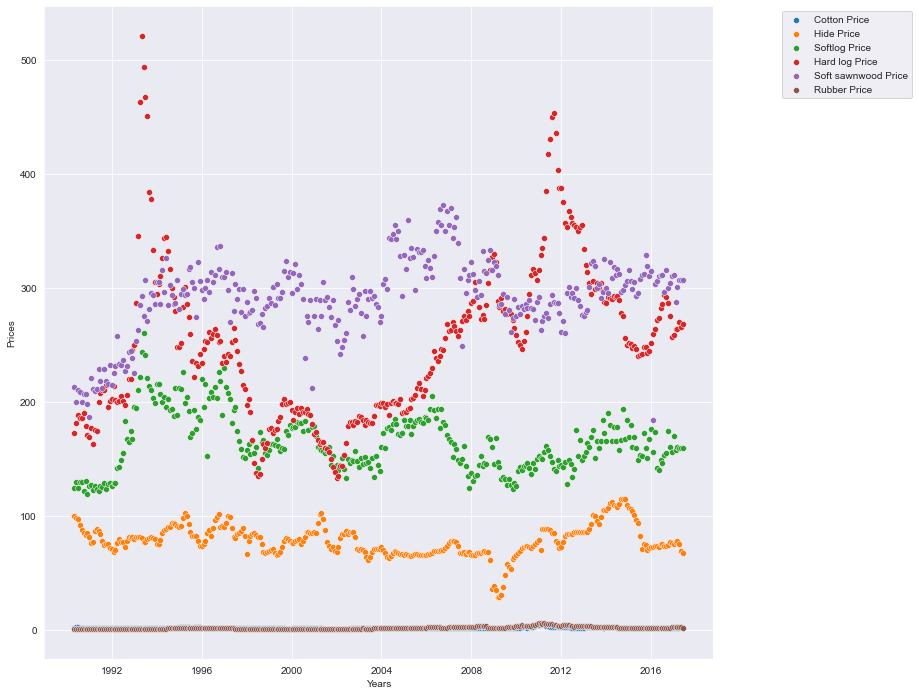

In [19]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
plt.show()

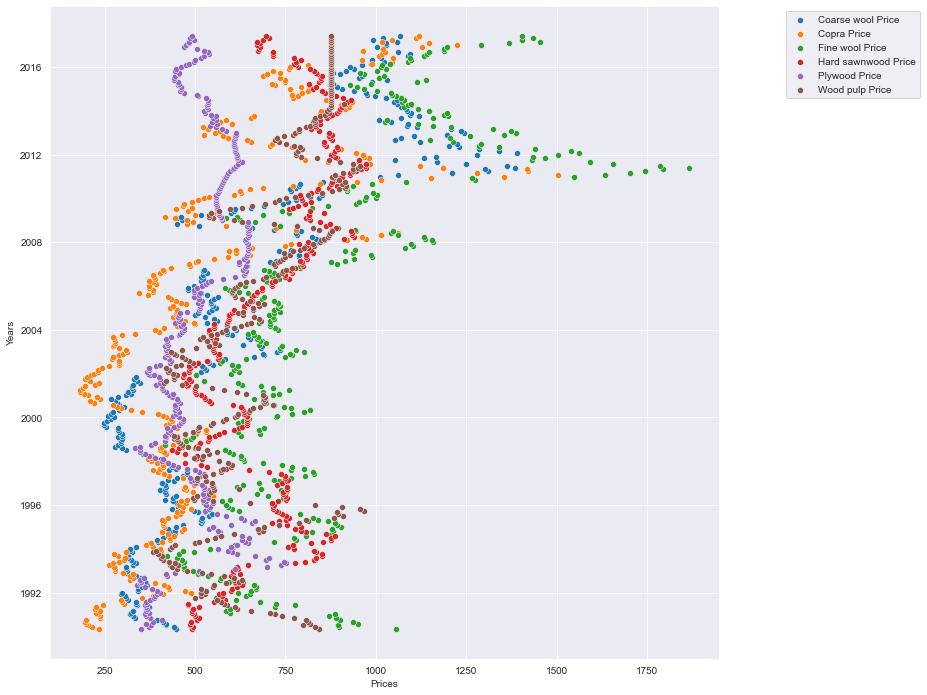

In [20]:
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))
plt.show()

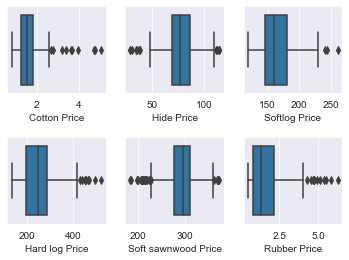

In [21]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])
plt.show()